# Decision Tree

### An Introduction

Classifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from matplotlib import pyplot as plt

In [2]:
iris = load_iris()
X = iris.data # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=100)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=100)

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=open("iris_tree.dot",'w'),
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

http://www.graphviz.org/


##### Easily convert your Python notebooks into interactive web apps by adding parameters in YAML.
https://github.com/mljar/mercury

https://mljar.com/blog/visualize-decision-tree/


In [19]:
text_representation = tree.export_text(tree_clf)
print(text_representation)


|--- feature_1 <= 0.80
|   |--- class: 0
|--- feature_1 >  0.80
|   |--- feature_1 <= 1.75
|   |   |--- feature_0 <= 4.95
|   |   |   |--- feature_1 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- feature_1 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.55
|   |   |   |   |--- feature_0 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_1 >  1.75
|   |   |--- feature_0 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.85
|   |   |   |--- class: 2



In [20]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# Plot Tree with plot_tree

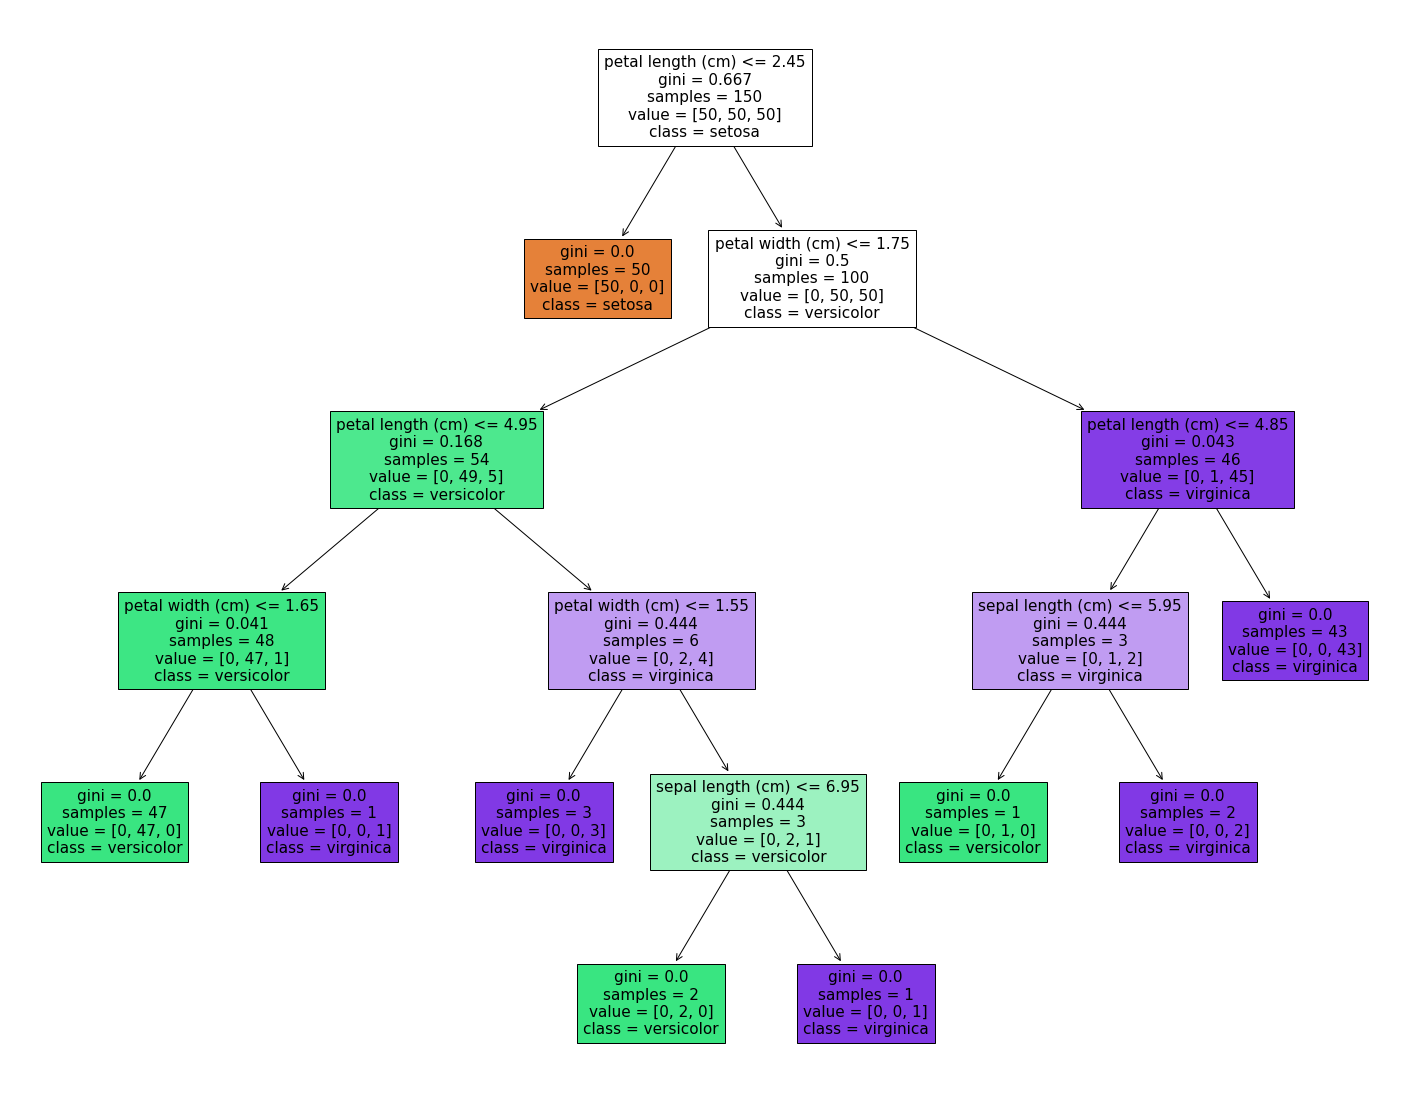

In [6]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


# Vorhersagen treffen

Schauen wir uns an, wie der oberen Abbildung dargestellte Baum Vorhersagen macht. Angenommen, Sie finden eine Irisblüte und möchten sie klassifizieren. Sie beginnen mit dem Wurzelknoten (Tiefe 0, ganz oben): Dieser Knoten fragt, ob die Blütenblattlänge der Blume kleiner als 0,8 cm ist. Ist dies der Fall, gehen Sie zum linken Unterknoten der Wurzel (Tiefe 1, links). In diesem Fall handelt es sich um einen Blatt Knoten (d. h. er hat keine Kindknoten), so dass er keine Fragen stellt: Sie Sie können sich einfach die vorhergesagte Klasse für diesen Knoten ansehen und der Entscheidungsbaum sagt voraus dass Ihre Blume eine Iris-Setosa ( class=setosa ) ist.

Nehmen wir an, Sie finden eine andere Blume, aber diesmal ist die Länge der Blütenblätter größer als 0,8 cm. Sie müssen zum rechten Unterknoten der Wurzel (Tiefe 1, rechts) gehen, der der kein Blattknoten ist und daher eine weitere Frage stellt: Ist die Blütenblattbreite kleiner als 1,75 cm? Wenn ist, dann ist Ihre Blume höchstwahrscheinlich eine Iris-Versicolor (Tiefe 2, links). Wenn nicht, handelt es sich wahrscheinlich um eine Iris-Virginica (Tiefe 2, rechts). Es ist wirklich so einfach.

In [23]:
fig.savefig("decistion_tree.png")

# Visualize Decision Tree with graphviz

# Plot Decision Tree with dtreeviz Package

from dtreeviz.trees import dtreeviz # remember to load the package
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'


viz = dtreeviz(tree_clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz


In [ ]:
Decision Tree decision boundaries plot

## Decision Tree - Regression

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=4)

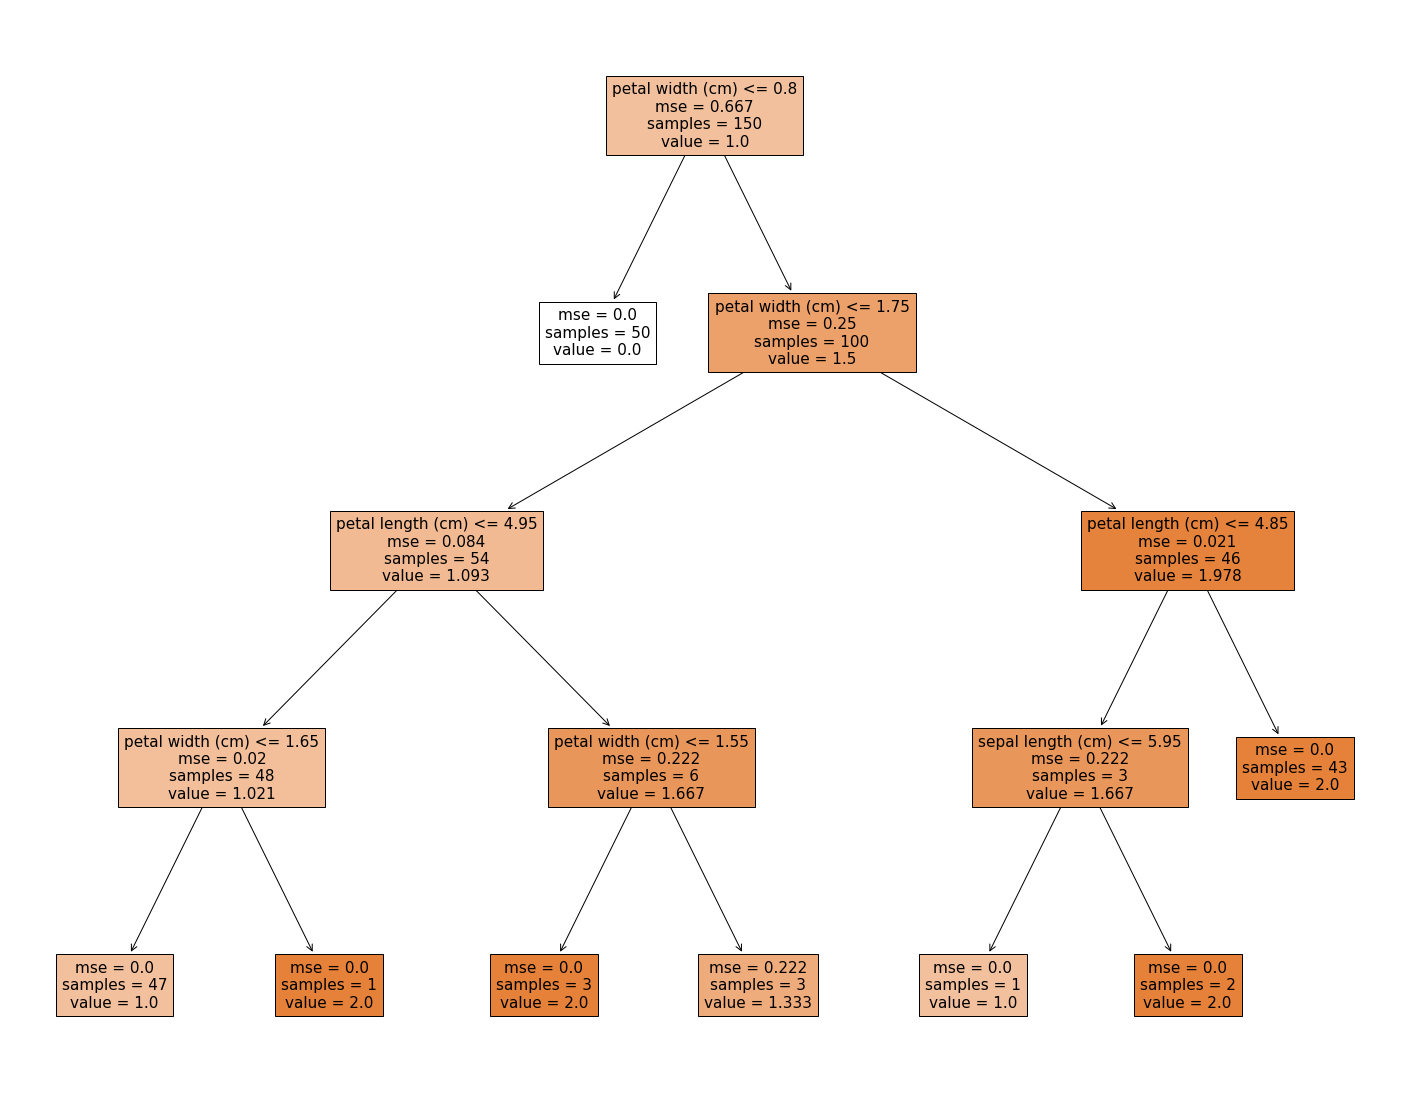

In [4]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


Dieser Baum sieht dem Klassifikationsbaum, den Sie zuvor erstellt haben, sehr ähnlich. Der Hauptunterschied besteht darin, dass in jedem Knoten nicht eine Klasse, sondern ein Wert vorhergesagt wird. Ein Beispiel, Angenommen, Sie möchten eine Vorhersage für einen neuen Fall mit *x_1* = 0,8 treffen. Sie durchlaufen den Baum, beginnend an der Wurzel, und erreichen schließlich den Blattknoten, der die Vorhersage Wert=0,1106 vorhersagt. Diese Vorhersage ist einfach der durchschnittliche Zielwert der 110 Trainings Instanzen, die zu diesem Blattknoten gehören. Diese Vorhersage führt zu einem mittleren quadratischen Fehler (MSE) gleich 0,0151 über diese 110 Instanzen.

##### Zahlen sind noch falsch

# Regularization Hyperparameters

# https://inria.github.io/scikit-learn-mooc/python_scripts/trees_hyperparameters.html

https://github.com/mcnakhaee/palmerpenguins